# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
crypto_assets = [1.2,5.3] #BTC and ETH

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/"

In [5]:
# Fetch current BTC price
response_btc = requests.get(btc_url)
response_eth = requests.get(eth_url)

btc_price = response_btc.json()["data"]["1"]["quotes"]["USD"]["price"]
eth_price = response_eth.json()["data"]["1027"]["quotes"]["USD"]["price"]


# Fetch current ETH price
# YOUR CODE HERE!

# Compute current value of my crpto
my_btc = crypto_assets[0]
my_eth = crypto_assets[1]

my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $54390.00
The current value of your 5.3 ETH is $17511.31


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
ALPACA_API_KEY = os.getenv("ALPACA_API_KEY")
ALPACA_SECRET = os.getenv("ALPACA_SECRET")

# Create the Alpaca API object
alpaca = tradeapi.REST(ALPACA_API_KEY, ALPACA_SECRET, api_version="v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2021-09-10", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df = alpaca.get_barset(tickers, timeframe, start=today, end=today).df

# Preview DataFrame
df.head()

AGG                                        SPY  \
                             open    high       low   close   volume    open   
time                                                                           
2021-09-10 00:00:00-04:00  115.99  116.01  115.7801  115.87  2767552  451.04   

                                                            
                             high     low  close    volume  
time                                                        
2021-09-10 00:00:00-04:00  451.49  445.31  445.5  75763259

In [9]:
# Pick AGG and SPY close prices
agg_close_price = df["AGG"]["close"][0]
spy_close_price = df["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.87
Current SPY closing price: $445.5


In [10]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22275.00
The current value of your 200 AGG shares is $23174.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value


# Create savings DataFrame
df_savings = pd.DataFrame({"amount": {
                    "crypto": crypto,
                    "shares": shares
                }
})

# Display savings DataFrame
display(df_savings)

,amount
crypto,71901.306
shares,45449.000


array([<AxesSubplot:ylabel='amount'>], dtype=object)

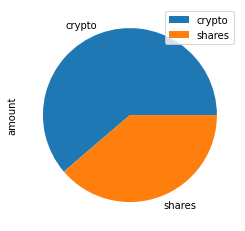

In [12]:
# Plot savings pie chart
df_savings.plot(kind="pie", subplots=True)

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings = df_savings["amount"].sum()

# Validate saving health
if savings > emergency_fund:
    print("Congratulations! You have enough funds to cover the emergency fund")
elif savings == emergency_fund:
    print("Congratulations! You have reached the goal of having enough funds to cover emergency expenses!")
else:
    print(f"Unfortunately, you need ${emergency_fund-savings} to reach the emergency fund goal")

Congratulations! You have enough funds to cover the emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(tickers, timeframe, start=start_date, end=end_date, limit=1000).df

# Display sample data
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sim = 500
weights = [.6,.4] # 60% stocks (SPY) 40% bonds (AGG) portfolio, weightings are in alphabetical order
MC = MCSimulation(
    portfolio_data = df_stock_data,
    num_trading_days = 252 * 30,
    num_simulation = num_sim,
    weights = weights
)

In [17]:
# Printing the simulation input data
print("Running 500 simulations for df_stock_data to predict returns over 30 years")

Running 500 simulations for df_stock_data to predict returns over 30 years


In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\chapm\fintech-course\unit5-financial-planning-assignment\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004000,1.000978,0.997044,1.002930,1.007829,0.998199,1.004939,0.998247,0.993701,1.001870,...,0.996120,0.986250,1.003841,1.000130,1.004095,1.002427,0.999929,0.991896,0.995410,0.993654
2,1.012810,1.000503,0.992331,1.005047,1.018989,1.002048,1.011681,0.997677,0.988212,0.989471,...,0.990168,0.986167,1.003386,1.003238,1.017348,1.005083,1.010880,0.987973,0.998232,0.982915
3,1.015447,1.000550,0.993367,1.013044,1.018804,1.000383,1.011379,0.987765,0.979424,0.989553,...,0.991459,0.985820,0.998580,1.007977,1.021433,1.009771,1.014799,0.980293,0.996397,0.983614
4,1.016201,1.007405,0.999878,1.010575,1.018698,1.004637,1.015524,0.983828,0.982892,0.993863,...,0.984360,0.988289,0.995566,1.007750,1.020553,1.013011,1.012251,0.983873,1.003448,0.970812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,15.466248,4.288769,12.108024,6.727177,3.198419,6.587566,6.270141,12.408121,9.971617,9.504921,...,7.886444,16.522100,10.259182,5.687597,2.900830,12.366153,5.593783,6.290790,1.252875,4.187994
7557,15.414644,4.284697,12.126518,6.635004,3.181747,6.578378,6.324295,12.464744,9.958773,9.578200,...,7.917812,16.501460,10.353079,5.666830,2.904208,12.352382,5.655286,6.290375,1.247212,4.195436
7558,15.463841,4.262329,12.133379,6.655229,3.185984,6.589708,6.300684,12.508716,9.937386,9.641491,...,8.002166,16.588966,10.315808,5.667733,2.872479,12.264529,5.702216,6.287454,1.246624,4.198115
7559,15.527127,4.275917,12.052431,6.686511,3.191286,6.593080,6.344307,12.548861,9.897970,9.615278,...,8.054135,16.677725,10.248455,5.688335,2.832291,12.362913,5.717409,6.273229,1.245835,4.217831


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

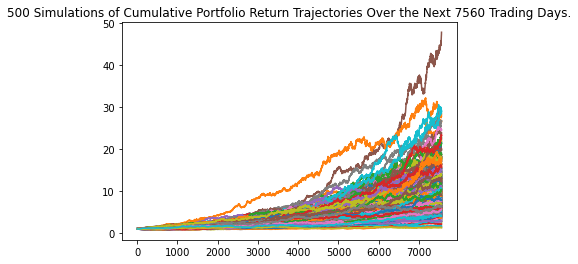

In [19]:
# Plot simulation outcomes
MC.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

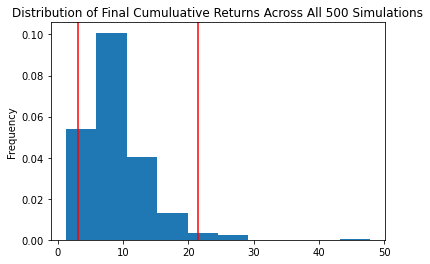

In [20]:
# Plot probability distribution and confidence intervals
MC.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              9.018519
std               4.819779
min               1.253487
25%               5.874064
50%               7.890023
75%              10.985626
max              47.855483
95% CI Lower      3.049522
95% CI Upper     21.467218
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = tbl[8] * initial_investment
ci_upper = tbl[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $60990.448650876926 and $429344.36616440205


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = tbl[8] * initial_investment
ci_upper = tbl[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $91485.67297631539 and $644016.549246603


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    num_trading_days = 252 * 5,
    num_simulation = num_sim,
    weights = weights
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\chapm\fintech-course\unit5-financial-planning-assignment\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995849,1.003366,0.999382,0.994702,0.998158,1.005143,0.998966,1.002647,1.009948,1.001150,...,1.002341,1.000614,1.004404,0.999069,0.996521,1.002080,1.000561,1.003011,0.998784,0.998536
2,0.997375,1.017552,0.997021,0.989845,0.999351,1.008330,0.999425,1.016978,1.018245,0.996068,...,1.002950,1.009007,1.003329,1.004255,0.999382,0.998195,0.988452,1.007180,0.995806,0.995489
3,0.999145,1.015097,0.987120,0.986173,1.003441,1.011979,0.998034,1.023132,1.020675,0.987111,...,1.005768,1.010873,1.000579,0.998234,0.993992,0.994371,0.987614,1.008046,0.994106,0.987838
4,0.996936,1.015461,0.983668,0.993061,1.002878,1.008348,1.006282,1.010873,1.019899,0.989487,...,1.012046,1.011746,0.995683,1.002619,0.995147,1.001736,0.993761,1.004678,0.997974,0.993467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.674726,1.947918,1.286660,1.166463,1.706328,1.657767,1.339602,1.319647,1.154786,1.160355,...,1.379535,1.604519,1.084489,1.371519,1.057478,1.744498,1.620739,1.192197,1.711505,1.172596
1257,1.674419,1.932120,1.294271,1.169392,1.709914,1.660727,1.335015,1.320418,1.154722,1.159349,...,1.378038,1.598565,1.086184,1.373510,1.053114,1.736495,1.637435,1.181822,1.716778,1.171742
1258,1.679341,1.939877,1.296720,1.168173,1.730199,1.645569,1.338669,1.314796,1.146965,1.168322,...,1.377857,1.606449,1.088425,1.379790,1.055819,1.722054,1.633527,1.186831,1.716809,1.173192
1259,1.693423,1.950144,1.301900,1.168023,1.736900,1.633437,1.334187,1.328351,1.143860,1.157127,...,1.389695,1.605150,1.102084,1.384429,1.053878,1.726811,1.638785,1.203464,1.733119,1.168926


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

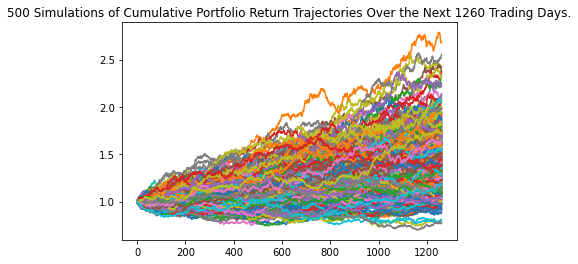

In [26]:
# Plot simulation outcomes
MC_five_year.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

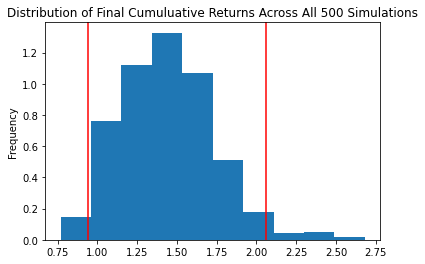

In [27]:
# Plot probability distribution and confidence intervals
MC_five_year.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
five_year_summary = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(five_year_summary)

count           500.000000
mean              1.441561
std               0.296868
min               0.767535
25%               1.233830
50%               1.426213
75%               1.635072
max               2.681882
95% CI Lower      0.942531
95% CI Upper      2.061495
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = five_year_summary[8] * initial_investment
ci_upper_five = five_year_summary[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 5 years will end within in the range of $47126.57489111462 and $103074.75242566904


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_year = MCSimulation(
    portfolio_data = df_stock_data,
    num_trading_days = 252 * 10,
    num_simulation = num_sim,
    weights = weights
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\chapm\fintech-course\unit5-financial-planning-assignment\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997469,0.998467,0.997045,1.005434,1.004776,1.001059,0.990222,1.005635,1.009581,1.010152,...,1.002324,1.007517,0.997535,0.994144,0.993845,0.990371,0.998729,1.000284,1.011960,1.003670
2,0.994555,1.006375,1.000155,1.001751,1.000845,1.009439,0.997607,1.002356,1.023651,0.999464,...,0.999659,1.013823,0.990816,0.994952,0.990330,0.985819,0.990021,1.001240,1.013940,1.000297
3,1.005906,1.008358,1.003702,0.992659,0.999630,1.006516,1.010676,1.010355,1.020077,1.004176,...,0.994949,1.018524,0.991811,0.989831,0.995293,0.980777,0.985907,0.984850,1.010389,1.009722
4,1.003417,1.001426,1.008961,1.000469,0.992998,1.000321,1.012617,1.014766,1.025838,0.995699,...,0.998448,1.020641,0.992084,0.983021,1.003268,0.985742,0.987963,0.982959,1.010186,1.000862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.741040,2.320751,2.325429,1.380165,3.492479,1.743510,1.188691,1.744523,2.656994,2.419303,...,1.828231,2.864688,1.531562,1.886041,1.373586,1.502190,1.900834,1.552711,2.314472,2.746321
2517,2.749304,2.306334,2.324391,1.392989,3.508207,1.732937,1.188599,1.751399,2.673096,2.424643,...,1.844955,2.864970,1.536391,1.889201,1.392210,1.501750,1.894440,1.547415,2.315415,2.762221
2518,2.735579,2.304737,2.314757,1.385346,3.477946,1.737403,1.199416,1.753910,2.668068,2.432630,...,1.844855,2.851353,1.546816,1.894998,1.400824,1.506498,1.898312,1.541010,2.294557,2.745999
2519,2.742766,2.311764,2.307643,1.399932,3.481075,1.727078,1.202160,1.762632,2.648044,2.461405,...,1.835323,2.830432,1.542891,1.900316,1.393510,1.502452,1.882258,1.528373,2.276386,2.748862


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

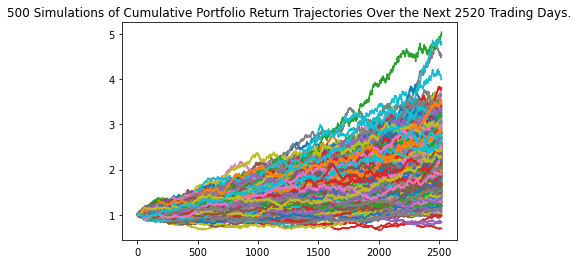

In [32]:
# Plot simulation outcomes
MC_10_year.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

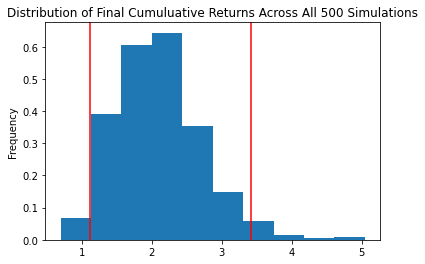

In [33]:
# Plot probability distribution and confidence intervals
MC_10_year.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_year_summary = MC_10_year.summarize_cumulative_return()

# Print summary statistics
print(ten_year_summary)

count           500.000000
mean              2.094376
std               0.615672
min               0.694363
25%               1.653754
50%               2.051861
75%               2.445602
max               5.045547
95% CI Lower      1.114719
95% CI Upper      3.412697
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = ten_year_summary[8] * initial_investment
ci_upper_ten = ten_year_summary[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 10 years will end within in the range of $55735.958531133576 and $170634.8576670041
